# Data Preprocessing & Visualization

In [67]:
# Import labraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# Current working directory

os.getcwd()

'c:\\Users\\Admin\\Documents\\Apziva_Projects'

In [69]:
# Loading the dataset

df = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [70]:
df.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [71]:
df.tail(5)

,Y,X1,X2,X3,X4,X5,X6
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


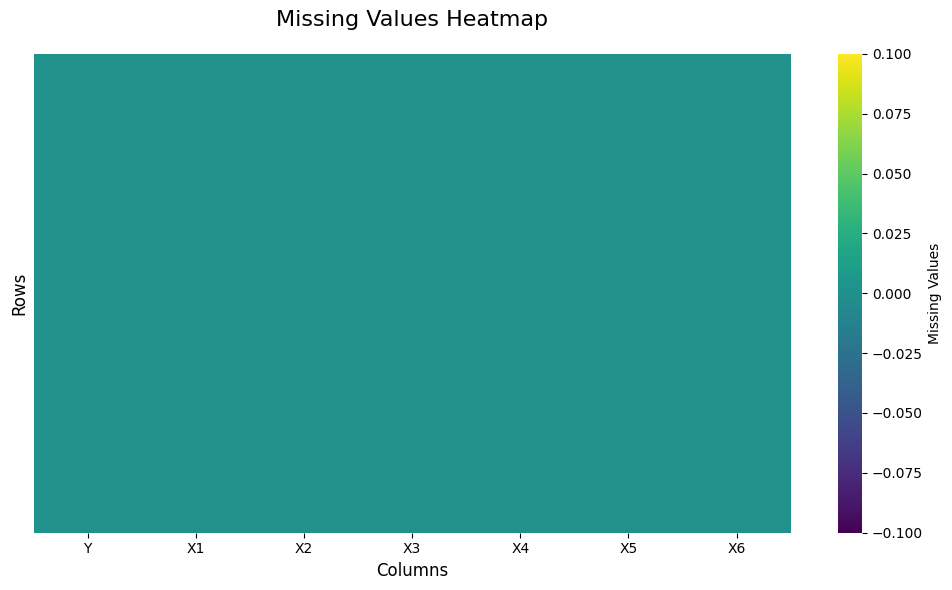

Missing Values Summary:
Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%


In [73]:
# Checking  NaN values


# Create heatmap of NaN values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), 
            cbar=True,
            yticklabels=False,  # Hide row labels for cleaner look
            cmap='viridis',     # Color scheme
            cbar_kws={'label': 'Missing Values'})

plt.title('Missing Values Heatmap', fontsize=16, pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Missing Values Summary:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")




The dataset doesn't contain any missing or empty value

STARTING OUTLIERS ANALYSIS...


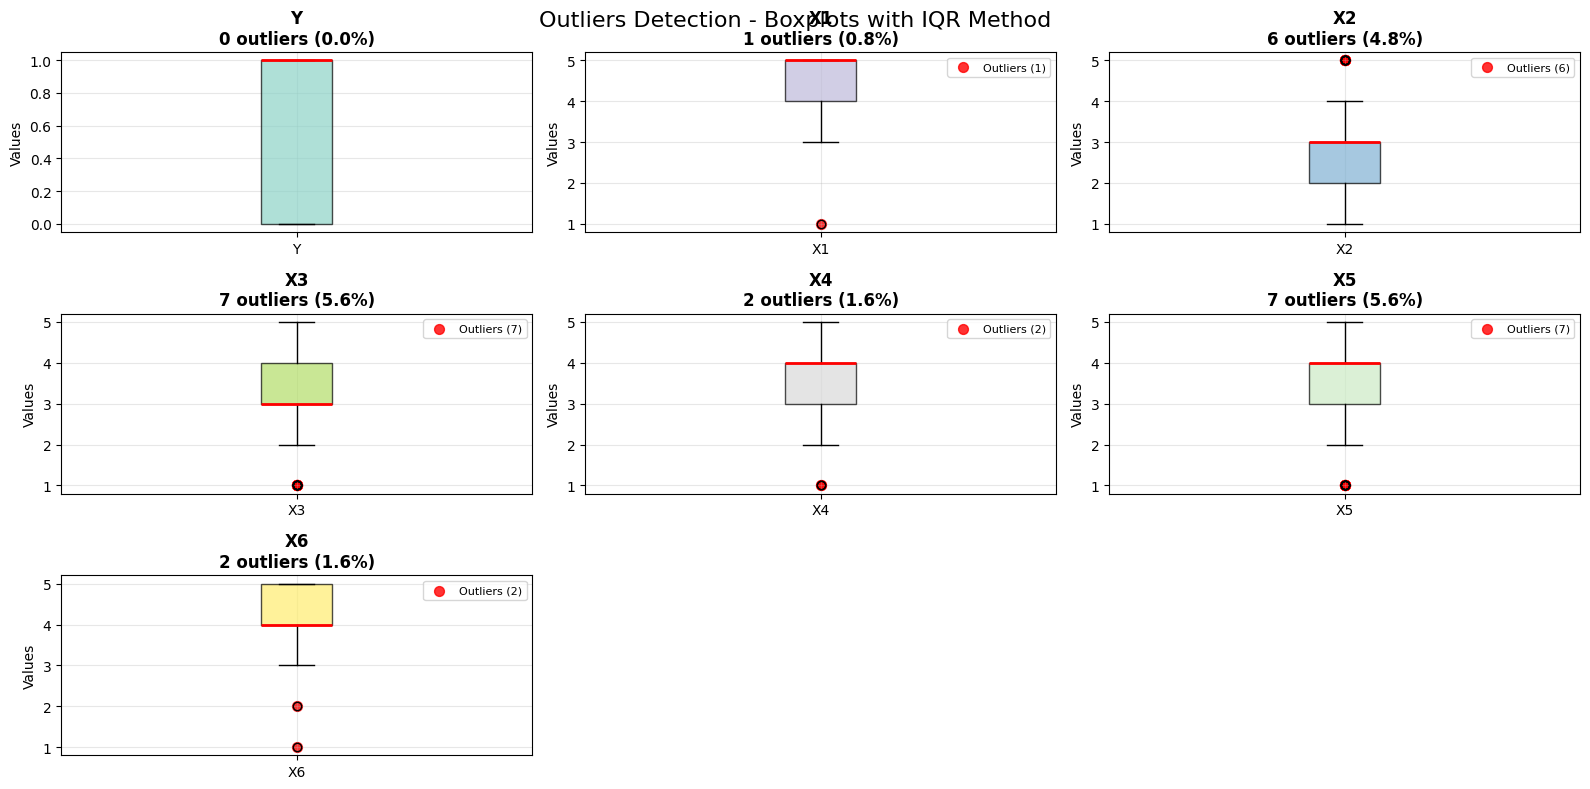

OUTLIERS DETECTION SUMMARY (IQR Method)

GLOBAL STATISTICS:
   - Total outliers detected: 25
   - Variables analyzed: 7

DETAILS BY VARIABLE:
------------------------------------------------------------

Y:
   - Outliers: 0 (0.00%)
   - IQR thresholds: [-1.500, 2.500]
   - Q1: 0.000 | Q3: 1.000 | IQR: 1.000
   CLEAN: No outliers detected!

X1:
   - Outliers: 1 (0.79%)
   - IQR thresholds: [2.500, 6.500]
   - Q1: 4.000 | Q3: 5.000 | IQR: 1.000
   - Most extreme values: ['1.000']
   OK: Acceptable outlier rate (0.8%)

X2:
   - Outliers: 6 (4.76%)
   - IQR thresholds: [0.500, 4.500]
   - Q1: 2.000 | Q3: 3.000 | IQR: 1.000
   - Most extreme values: ['5.000', '5.000', '5.000']
   OK: Acceptable outlier rate (4.8%)

X3:
   - Outliers: 7 (5.56%)
   - IQR thresholds: [1.500, 5.500]
   - Q1: 3.000 | Q3: 4.000 | IQR: 1.000
   - Most extreme values: ['1.000', '1.000', '1.000']
   MODERATE: Moderate outlier rate (5.6%)

X4:
   - Outliers: 2 (1.59%)
   - IQR thresholds: [1.500, 5.500]
   - Q1: 3.00

In [74]:
# Checking Outliers


from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')


def detect_outliers_iqr(df, columns=None, visualize=True, figsize=(16, 8)):
    """
    Detects outliers using the IQR method for each variable with boxplot visualization
    
    Parameters:
    -----------
    df : DataFrame
        The dataset to analyze
    columns : list, optional
        List of columns to analyze (default: all numeric columns)
    visualize : bool, default=True
        If True, displays boxplots
    figsize : tuple, default=(16, 8)
        Figure size
    
    Returns:
    --------
    outliers_dict : dict
        Dictionary with outlier information for each variable
    outliers_indices : list
        List of indices of all detected outliers
    """
    
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    outliers_dict = {}
    outliers_indices = set()
    
    # Outlier detection
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'indices': outliers.index.tolist(),
            'values': outliers[col].tolist(),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR
        }
        
        # Add indices to global set
        outliers_indices.update(outliers.index.tolist())
    
    # Visualization
    if visualize:
        create_boxplot_visualization(df, columns, outliers_dict, figsize)
    
    return outliers_dict, list(outliers_indices)

def create_boxplot_visualization(df, columns, outliers_dict, figsize):
    """
    Creates boxplots with highlighted outliers
    """
    n_cols = len(columns)
    n_rows = (n_cols + 2) // 3  # 3 columns per row
    
    fig, axes = plt.subplots(n_rows, 3, figsize=figsize)
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    colors = plt.cm.Set3(np.linspace(0, 1, n_cols))
    
    for i, col in enumerate(columns):
        if i < len(axes):
            ax = axes[i]
            
            # Create boxplot
            bp = ax.boxplot(df[col].dropna(), patch_artist=True, 
                           boxprops=dict(facecolor=colors[i], alpha=0.7),
                           medianprops=dict(color='red', linewidth=2))
            
            # Add outliers with different colors
            outliers_info = outliers_dict[col]
            if outliers_info['count'] > 0:
                outlier_values = outliers_info['values']
                ax.scatter([1] * len(outlier_values), outlier_values, 
                          color='red', s=50, alpha=0.8, marker='o', 
                          label=f'Outliers ({outliers_info["count"]})')
            
            # Customization
            ax.set_title(f'{col}\n{outliers_info["count"]} outliers ({outliers_info["percentage"]:.1f}%)', 
                        fontsize=12, fontweight='bold')
            ax.set_ylabel('Values')
            ax.grid(True, alpha=0.3)
            ax.set_xticklabels([col])
            
            if outliers_info['count'] > 0:
                ax.legend(loc='upper right', fontsize=8)
    
    # Hide unused axes
    for i in range(len(columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Outliers Detection - Boxplots with IQR Method', fontsize=16, y=0.98)
    plt.show()

def print_outliers_summary(outliers_dict):
    """
    Displays a detailed summary of detected outliers
    """
    print("=" * 60)
    print("OUTLIERS DETECTION SUMMARY (IQR Method)")
    print("=" * 60)
    
    total_outliers = sum([info['count'] for info in outliers_dict.values()])
    print(f"\nGLOBAL STATISTICS:")
    print(f"   - Total outliers detected: {total_outliers}")
    print(f"   - Variables analyzed: {len(outliers_dict)}")
    
    print(f"\nDETAILS BY VARIABLE:")
    print("-" * 60)
    
    for col, info in outliers_dict.items():
        print(f"\n{col.upper()}:")
        print(f"   - Outliers: {info['count']} ({info['percentage']:.2f}%)")
        print(f"   - IQR thresholds: [{info['lower_bound']:.3f}, {info['upper_bound']:.3f}]")
        print(f"   - Q1: {info['Q1']:.3f} | Q3: {info['Q3']:.3f} | IQR: {info['IQR']:.3f}")
        
        if info['count'] > 0:
            extreme_values = sorted(info['values'], key=abs, reverse=True)[:3]
            print(f"   - Most extreme values: {[f'{v:.3f}' for v in extreme_values]}")
        
        # Contamination level assessment
        if info['percentage'] > 10:
            print(f"   WARNING: High outlier rate ({info['percentage']:.1f}%)")
        elif info['percentage'] > 5:
            print(f"   MODERATE: Moderate outlier rate ({info['percentage']:.1f}%)")
        elif info['count'] > 0:
            print(f"   OK: Acceptable outlier rate ({info['percentage']:.1f}%)")
        else:
            print(f"   CLEAN: No outliers detected!")
    
    print("\n" + "=" * 60)

def analyze_outliers_complete(df, columns=None, show_summary=True):
    """
    Complete outliers analysis with boxplot visualization
    """
    print("STARTING OUTLIERS ANALYSIS...")
    
    # Detection with boxplot visualization
    outliers_info, all_outliers_indices = detect_outliers_iqr(
        df, columns=columns, visualize=True
    )
    
    # Display summary
    if show_summary:
        print_outliers_summary(outliers_info)
    
    # Recommendations
    total_outliers_pct = len(all_outliers_indices) / len(df) * 100
    
    print(f"\nRECOMMENDATIONS:")
    if total_outliers_pct > 15:
        print("   HIGH: Very high outlier rate - Check data quality")
    elif total_outliers_pct > 10:
        print("   MODERATE: High outlier rate - Examine causes")
    elif total_outliers_pct > 5:
        print("   NORMAL: Normal outlier rate - Analyze case by case")
    else:
        print("   EXCELLENT: Very good dataset quality")
    
    return outliers_info, all_outliers_indices



    
    # Run complete analysis
outliers_info, outliers_indices = analyze_outliers_complete(df)

The number of outliers in the dataset is negligible. Therefore, we may use StandardScaler instead of RobustScaler for standardization, as it is more efficient and better suited for normally distributed data with minimal outliers.

In [75]:
# Separate independant variables and the targert variable

X = df.drop('Y', axis = 1)
y = df["Y"]

In [76]:
X

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
...,...,...,...,...,...,...
121,5,2,3,4,4,3
122,5,2,3,4,2,5
123,5,3,3,4,4,5
124,4,3,3,4,4,5


In [77]:
y

0      0
1      0
2      1
3      0
4      0
      ..
121    1
122    1
123    1
124    0
125    0
Name: Y, Length: 126, dtype: int64

In [78]:
y.value_counts()

Y
1    69
0    57
Name: count, dtype: int64

The classes in the dataset are almost balanced, meaning each target category has a similar number of observations. This ensures that the model will not be biased toward a majority class and can generalize well across all categories.

In [79]:
# Linear correlation between variables

X.corr()

,X1,X2,X3,X4,X5,X6
X1,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


The linear correlation between variables is generally weak. This suggests that each variable contributes independent information to the model, reducing multicollinearity risks and potentially improving estimator performance.

# Data Modeling

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

def compare_classification_models(X, y, test_size=0.2, random_state=42):
    """
    Standardizes data, splits into train/test, trains 3 models and returns accuracy scores
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    test_size : float, default=0.2
        Proportion of dataset to include in test split
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    accuracy_scores : dict
        Dictionary containing test accuracy for each model
    """
    
    # Convert to numpy arrays if needed
    if hasattr(X, 'values'):
        X = X.values
    if hasattr(y, 'values'):
        y = y.values
    
    # Reshape y to ensure it's 1-dimensional
    y = y.reshape(-1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models with default parameters
    models = {
        'Logistic_Regression': LogisticRegression(random_state=random_state),
        'Random_Forest': RandomForestClassifier(random_state=random_state),
        'XGBoost': xgb.XGBClassifier(random_state=random_state)
    }
    
    # Train models and calculate accuracy
    accuracy_scores = {}
    
    for model_name, model in models.items():
        if model_name == 'Logistic_Regression':
            # Use scaled data for Logistic Regression
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            # Use the tree-based models
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        
        accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    
    return accuracy_scores



In [81]:
accuracy_scores = compare_classification_models(X, y, test_size=0.2, random_state=42)

In [82]:
accuracy_scores

{'Logistic_Regression': 0.6153846153846154,
 'Random_Forest': 0.6538461538461539,
 'XGBoost': 0.46153846153846156}

Among the three default models (Logistic Regression, Random Forest, and XGBoost), Random Forest demonstrates the highest accuracy. Let's optimize these models.

# Models Optimisation

# RandomForest Optimisation

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def optimize_random_forest_pipeline(X, y, feature_names=None, test_size=0.2, random_state=42, plot_importance=True):
    """
    Creates pipeline for RandomForest with GridSearchCV optimization and feature importance visualization
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    feature_names : list, optional
        Names of features for visualization
    test_size : float, default=0.2
        Proportion of dataset to include in test split
    random_state : int, default=42
        Random state for reproducibility
    plot_importance : bool, default=True
        Whether to plot feature importance
    
    Returns:
    --------
    results : dict
        Dictionary containing accuracy score and feature importance
    """
    
    # Convert to numpy arrays if needed and get feature names
    if hasattr(X, 'columns'):
        if feature_names is None:
            feature_names = X.columns.tolist()
        X = X.values
    elif feature_names is None:
        feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
    
    if hasattr(y, 'values'):
        y = y.values
    
    # Reshape y to ensure it's 1-dimensional
    y = y.reshape(-1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Create pipeline for RandomForest
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=random_state))
    ])
    
    # Parameter grid for GridSearchCV
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }
    
    # GridSearchCV optimization
    grid_search = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    
    # Fit and get best model
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Extract feature importance from the trained RandomForest
    rf_model = best_model.named_steps['classifier']
    feature_importance = rf_model.feature_importances_
    
    # Create feature importance dictionary
    importance_dict = {
        'feature_names': feature_names,
        'importance_scores': feature_importance,
        'importance_percentage': (feature_importance / feature_importance.sum()) * 100
    }
    
    # Sort by importance
    importance_indices = np.argsort(feature_importance)[::-1]
    sorted_features = [feature_names[i] for i in importance_indices]
    sorted_importance = feature_importance[importance_indices]
    sorted_percentage = (sorted_importance / sorted_importance.sum()) * 100
    
    # Print optimization results
    print("RANDOM FOREST OPTIMIZATION RESULTS")
    print("=" * 45)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    print(f"\nTOP 10 FEATURE IMPORTANCE:")
    print("-" * 45)
    for i in range(min(10, len(sorted_features))):
        print(f"{i+1:2d}. {sorted_features[i]:<20} {sorted_percentage[i]:6.2f}%")
    
    # Plot feature importance
    if plot_importance:
        plot_feature_importance(sorted_features, sorted_percentage, top_n=15)
    
    # Prepare results
    results = {
        'accuracy': test_accuracy,
        'best_params': grid_search.best_params_,
        'cv_score': grid_search.best_score_,
        'feature_importance': importance_dict,
        'model': best_model
    }
    
    return results

def plot_feature_importance(feature_names, importance_scores, top_n=15, figsize=(12, 8)):
    """
    Plots feature importance for RandomForest model
    
    Parameters:
    -----------
    feature_names : list
        Names of features (already sorted by importance)
    importance_scores : array
        Importance scores (already sorted)
    top_n : int, default=15
        Number of top features to display
    figsize : tuple, default=(12, 8)
        Figure size
    """
    # Take top N features
    top_features = feature_names[:top_n]
    top_scores = importance_scores[:top_n]
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Create horizontal bar plot
    y_pos = np.arange(len(top_features))
    bars = plt.barh(y_pos, top_scores, color='forestgreen', alpha=0.7)
    
    # Customize the plot
    plt.yticks(y_pos, top_features)
    plt.xlabel('Feature Importance (%)')
    plt.title('RandomForest Feature Importance (Top Features)', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()  # Highest importance at top
    
    # Add value labels on bars
    for i, (bar, score) in enumerate(zip(bars, top_scores)):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{score:.2f}%', ha='left', va='center', fontsize=10)
    
    # Add grid and styling
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()



RANDOM FOREST OPTIMIZATION RESULTS
Best parameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best CV score: 0.6300
Test accuracy: 0.6923

TOP 10 FEATURE IMPORTANCE:
---------------------------------------------
 1. X5                    18.36%
 2. X3                    18.23%
 3. X4                    18.09%
 4. X1                    17.47%
 5. X2                    17.06%
 6. X6                    10.80%


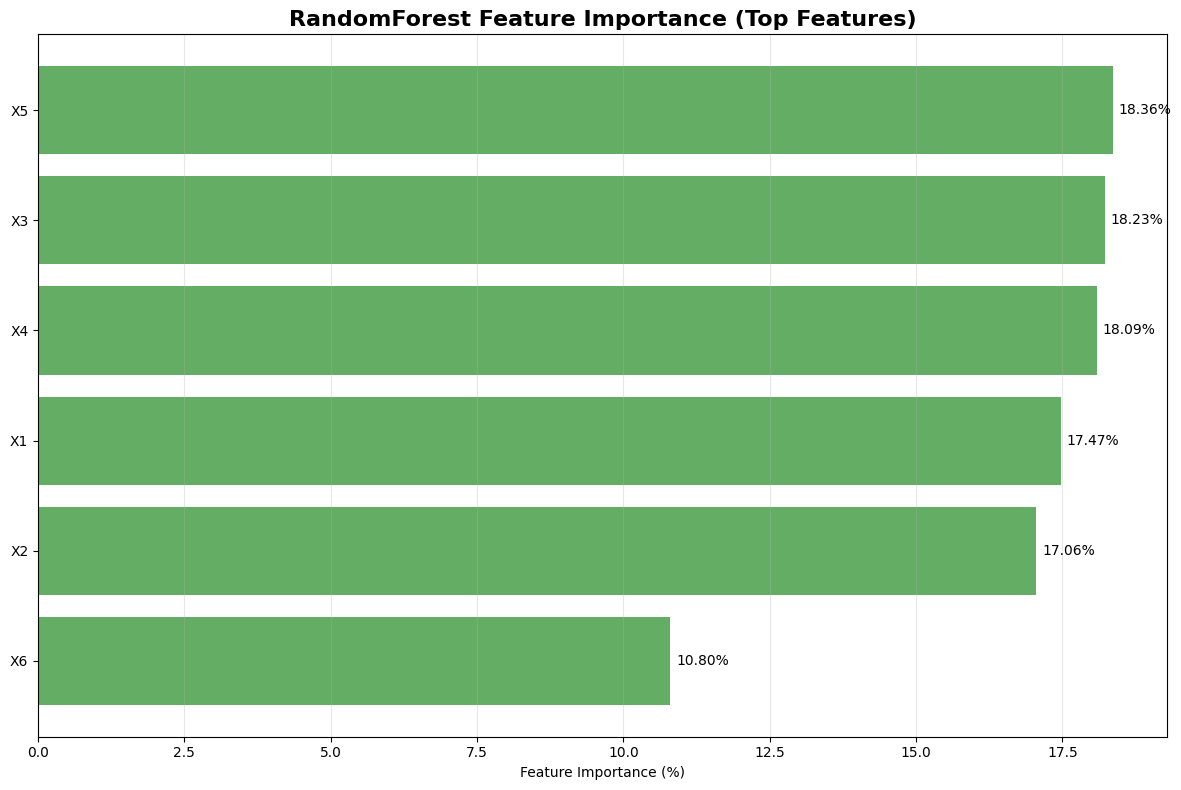

In [84]:
results = optimize_random_forest_pipeline(X, y, test_size=0.2, random_state=42)

This model identifies X5, X3, and X4 as important predictors for customer happyness. Let's train the model with the five top significant features.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def train_top_features_rf(X, y, rf_results, top_n=3, feature_names=None, test_size=0.2, random_state=42):
    """
    Trains and evaluates RandomForest using only the top N most important features
    from the previous optimization results
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    rf_results : dict
        Results dictionary from optimize_random_forest_pipeline function
    top_n : int, default=3
        Number of top features to select
    feature_names : list, optional
        Names of features
    test_size : float, default=0.2
        Proportion of dataset to include in test split
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    top_results : dict
        Dictionary containing accuracy and feature information for top N features model
    """
    
    # Convert to numpy arrays if needed and get feature names
    if hasattr(X, 'columns'):
        if feature_names is None:
            feature_names = X.columns.tolist()
        X = X.values
    elif feature_names is None:
        feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
    
    if hasattr(y, 'values'):
        y = y.values
    
    # Reshape y to ensure it's 1-dimensional
    y = y.reshape(-1)
    
    # Extract top N most important features from previous results
    feature_importance = rf_results['feature_importance']['importance_scores']
    importance_indices = np.argsort(feature_importance)[::-1]
    
    # Validate top_n parameter
    max_features = len(feature_names)
    if top_n > max_features:
        print(f"Warning: top_n ({top_n}) exceeds available features ({max_features}). Using all features.")
        top_n = max_features
    
    # Get top N feature indices and names
    top_indices = importance_indices[:top_n]
    top_feature_names = [feature_names[i] for i in top_indices]
    top_importance = feature_importance[top_indices]
    top_percentage = (top_importance / top_importance.sum()) * 100
    
    print(f"TOP {top_n} FEATURES RANDOM FOREST TRAINING")
    print("=" * 45)
    print(f"Selected top {top_n} features:")
    for i, (name, pct) in enumerate(zip(top_feature_names, top_percentage)):
        print(f"{i+1}. {name:<15} {pct:6.2f}%")
    
    # Select only top N features from X
    X_top = X[:, top_indices]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_top, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Use the same best parameters from the original optimization
    best_params = rf_results['best_params']
    
    # Extract RandomForest parameters (remove 'classifier__' prefix)
    rf_params = {k.replace('classifier__', ''): v for k, v in best_params.items()}
    
    # Create pipeline with the optimized parameters
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=random_state, **rf_params))
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate training accuracy for comparison
    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Print results
    print(f"\nRESULTS:")
    print("-" * 30)
    print(f"Train accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy:  {test_accuracy:.4f}")
    print(f"Overfitting:    {train_accuracy - test_accuracy:.4f}")
    
    # Compare with original model performance
    original_accuracy = rf_results['accuracy']
    accuracy_difference = test_accuracy - original_accuracy
    
    print(f"\nCOMPARISON WITH FULL MODEL:")
    print("-" * 35)
    print(f"Original accuracy (all features): {original_accuracy:.4f}")
    print(f"Top {top_n} accuracy:                   {test_accuracy:.4f}")
    print(f"Difference:                       {accuracy_difference:+.4f}")
    
    if accuracy_difference >= -0.01:  # Less than 1% drop
        print(f"Top {top_n} features maintain similar performance!")
    elif accuracy_difference >= -0.05:  # Less than 5% drop
        print(f"Top {top_n} features show acceptable performance")
    else:
        print(f"Significant performance drop with only top {top_n} features")
    
    # Prepare results
    top_results = {
        'accuracy': test_accuracy,
        'train_accuracy': train_accuracy,
        'overfitting': train_accuracy - test_accuracy,
        'top_features': top_feature_names,
        'top_indices': top_indices,
        'top_importance': top_importance,
        'top_percentage': top_percentage,
        'top_n': top_n,
        'model': pipeline,
        'comparison': {
            'original_accuracy': original_accuracy,
            'accuracy_difference': accuracy_difference,
            'features_reduced': len(feature_names) - top_n
        }
    }
    
    return top_results


In [86]:
top_results = train_top_features_rf(X, y, results, top_n=5, feature_names=None, test_size=0.2, random_state=42)

TOP 5 FEATURES RANDOM FOREST TRAINING
Selected top 5 features:
1. X5               20.59%
2. X3               20.43%
3. X4               20.28%
4. X1               19.58%
5. X2               19.12%

RESULTS:
------------------------------
Train accuracy: 0.8500
Test accuracy:  0.7308
Overfitting:    0.1192

COMPARISON WITH FULL MODEL:
-----------------------------------
Original accuracy (all features): 0.6923
Top 5 accuracy:                   0.7308
Difference:                       +0.0385
Top 5 features maintain similar performance!


After optimizing RandomForest, we achieved the expected accuracy by including the five and six top variables. Notably, the model maintains this performance even when using all six variables.

# LogisticRegression Optimisation

LOGISTIC REGRESSION OPTIMIZATION RESULTS
Best parameters: {'classifier__C': 0.01, 'classifier__l1_ratio': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best CV score: 0.5600
Test accuracy: 0.5769

TOP 10 FEATURE IMPORTANCE (Absolute Coefficients):
--------------------------------------------------
 1. X1                    33.77%
 2. X5                    28.19%
 3. X3                    13.94%
 4. X2                    10.92%
 5. X6                     9.72%
 6. X4                     3.47%


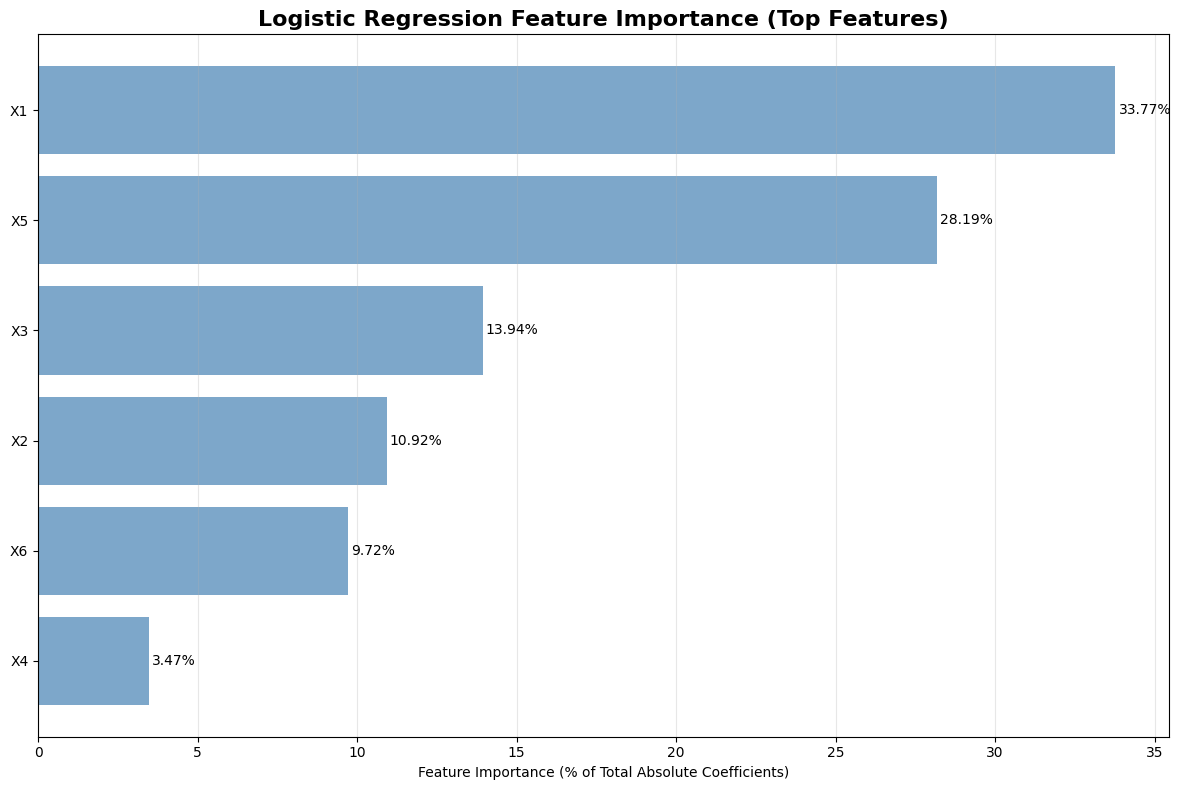

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def optimize_logistic_regression_pipeline(X, y, feature_names=None, test_size=0.2, random_state=42, plot_importance=True):
    """
    Creates pipeline for Logistic Regression with GridSearchCV optimization and feature importance visualization
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    feature_names : list, optional
        Names of features for visualization
    test_size : float, default=0.2
        Proportion of dataset to include in test split
    random_state : int, default=42
        Random state for reproducibility
    plot_importance : bool, default=True
        Whether to plot feature importance (coefficients)
    
    Returns:
    --------
    results : dict
        Dictionary containing accuracy score and feature importance (coefficients)
    """
    
    # Convert to numpy arrays if needed and get feature names
    if hasattr(X, 'columns'):
        if feature_names is None:
            feature_names = X.columns.tolist()
        X = X.values
    elif feature_names is None:
        feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
    
    if hasattr(y, 'values'):
        y = y.values
    
    # Reshape y to ensure it's 1-dimensional
    y = y.reshape(-1)
    
    # Train-test split with stratification to maintain class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Create pipeline for Logistic Regression
    # StandardScaler is important for logistic regression as it's sensitive to feature scales
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=random_state))
    ])
    
    # Parameter grid for GridSearchCV
    # C: Inverse of regularization strength (smaller values = stronger regularization)
    # penalty: Regularization type (l1=Lasso, l2=Ridge, elasticnet=combination)
    # solver: Algorithm for optimization
    param_grid = {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2', 'elasticnet'],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__l1_ratio': [0.1, 0.5, 0.9]  # Only used when penalty='elasticnet'
    }
    
    # GridSearchCV optimization with 5-fold cross-validation
    grid_search = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    
    # Fit the model and find best hyperparameters
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Make predictions on test set
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Extract coefficients from the trained Logistic Regression
    # Coefficients represent feature importance (how much each feature influences the prediction)
    lr_model = best_model.named_steps['classifier']
    
    # For binary classification, coef_ has shape (1, n_features)
    # For multiclass, coef_ has shape (n_classes, n_features)
    if len(lr_model.coef_.shape) == 1:
        coefficients = lr_model.coef_
    else:
        # For multiclass, we take the absolute mean across classes
        coefficients = np.mean(np.abs(lr_model.coef_), axis=0)
    
    # Use absolute values of coefficients as feature importance
    feature_importance = np.abs(coefficients)
    
    # Create feature importance dictionary
    importance_dict = {
        'feature_names': feature_names,
        'importance_scores': feature_importance,
        'importance_percentage': (feature_importance / feature_importance.sum()) * 100,
        'raw_coefficients': coefficients  # Keep original coefficients for interpretation
    }
    
    # Sort features by importance (absolute coefficient values)
    importance_indices = np.argsort(feature_importance)[::-1]
    sorted_features = [feature_names[i] for i in importance_indices]
    sorted_importance = feature_importance[importance_indices]
    sorted_percentage = (sorted_importance / sorted_importance.sum()) * 100
    
    # Print optimization results
    print("LOGISTIC REGRESSION OPTIMIZATION RESULTS")
    print("=" * 50)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    print(f"\nTOP 10 FEATURE IMPORTANCE (Absolute Coefficients):")
    print("-" * 50)
    for i in range(min(10, len(sorted_features))):
        print(f"{i+1:2d}. {sorted_features[i]:<20} {sorted_percentage[i]:6.2f}%")
    
    # Plot feature importance if requested
    if plot_importance:
        plot_feature_importance(sorted_features, sorted_percentage, top_n=15)
    
    # Prepare results dictionary
    results = {
        'accuracy': test_accuracy,
        'best_params': grid_search.best_params_,
        'cv_score': grid_search.best_score_,
        'feature_importance': importance_dict,
        'model': best_model
    }
    
    return results

def plot_feature_importance(feature_names, importance_scores, top_n=15, figsize=(12, 8)):
    """
    Plots feature importance for Logistic Regression model based on absolute coefficient values
    
    Parameters:
    -----------
    feature_names : list
        Names of features (already sorted by importance)
    importance_scores : array
        Importance scores (already sorted) - absolute coefficient values as percentages
    top_n : int, default=15
        Number of top features to display
    figsize : tuple, default=(12, 8)
        Figure size for the plot
    """
    # Take top N features to avoid overcrowded plots
    top_features = feature_names[:top_n]
    top_scores = importance_scores[:top_n]
    
    # Create the horizontal bar plot
    plt.figure(figsize=figsize)
    
    # Create horizontal bars with a professional color scheme
    y_pos = np.arange(len(top_features))
    bars = plt.barh(y_pos, top_scores, color='steelblue', alpha=0.7)
    
    # Customize the plot appearance
    plt.yticks(y_pos, top_features)
    plt.xlabel('Feature Importance (% of Total Absolute Coefficients)')
    plt.title('Logistic Regression Feature Importance (Top Features)', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()  # Show highest importance at the top
    
    # Add value labels on bars for better readability
    for i, (bar, score) in enumerate(zip(bars, top_scores)):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{score:.2f}%', ha='left', va='center', fontsize=10)
    
    # Add grid and final styling touches
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


# Run the optimization pipeline
results_2 = optimize_logistic_regression_pipeline(X, y, test_size=0.2, random_state=42)
    
    

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def train_top_features_lr(X, y, lr_results, top_n=3, feature_names=None, test_size=0.2, random_state=42):
    """
    Trains and evaluates Logistic Regression using only the top N most important features
    from the previous optimization results
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    lr_results : dict
        Results dictionary from optimize_logistic_regression_pipeline function
    top_n : int, default=3
        Number of top features to select based on coefficient importance
    feature_names : list, optional
        Names of features for interpretation
    test_size : float, default=0.2
        Proportion of dataset to include in test split
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    top_results : dict
        Dictionary containing accuracy and feature information for top N features model
    """
    
    # Convert to numpy arrays if needed and get feature names
    if hasattr(X, 'columns'):
        if feature_names is None:
            feature_names = X.columns.tolist()
        X = X.values
    elif feature_names is None:
        feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
    
    if hasattr(y, 'values'):
        y = y.values
    
    # Reshape y to ensure it's 1-dimensional
    y = y.reshape(-1)
    
    # Extract top N most important features from previous logistic regression results
    # Feature importance is based on absolute coefficient values
    feature_importance = lr_results['feature_importance']['importance_scores']
    importance_indices = np.argsort(feature_importance)[::-1]
    
    # Validate top_n parameter to ensure it doesn't exceed available features
    max_features = len(feature_names)
    if top_n > max_features:
        print(f"Warning: top_n ({top_n}) exceeds available features ({max_features}). Using all features.")
        top_n = max_features
    
    # Get top N feature indices, names, and importance scores
    top_indices = importance_indices[:top_n]
    top_feature_names = [feature_names[i] for i in top_indices]
    top_importance = feature_importance[top_indices]
    top_percentage = (top_importance / top_importance.sum()) * 100
    
    # Display selected features information
    print(f"TOP {top_n} FEATURES LOGISTIC REGRESSION TRAINING")
    print("=" * 50)
    print(f"Selected top {top_n} features based on coefficient importance:")
    for i, (name, pct) in enumerate(zip(top_feature_names, top_percentage)):
        print(f"{i+1}. {name:<20} {pct:6.2f}%")
    
    # Select only top N features from the feature matrix
    X_top = X[:, top_indices]
    
    # Perform train-test split with stratification to maintain class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X_top, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Use the same best hyperparameters from the original optimization
    best_params = lr_results['best_params']
    
    # Extract Logistic Regression parameters (remove 'classifier__' prefix)
    lr_params = {k.replace('classifier__', ''): v for k, v in best_params.items()}
    
    # Create pipeline with the optimized hyperparameters
    # StandardScaler is crucial for logistic regression feature scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=random_state, **lr_params))
    ])
    
    # Train the logistic regression model on top features
    pipeline.fit(X_train, y_train)
    
    # Make predictions on both training and test sets
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate training accuracy to assess overfitting
    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Display training results
    print(f"\nRESULTS:")
    print("-" * 30)
    print(f"Train accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy:  {test_accuracy:.4f}")
    print(f"Overfitting:    {train_accuracy - test_accuracy:.4f}")
    
    # Compare performance with the original full-feature model
    original_accuracy = lr_results['accuracy']
    accuracy_difference = test_accuracy - original_accuracy
    
    print(f"\nCOMPARISON WITH FULL MODEL:")
    print("-" * 35)
    print(f"Original accuracy (all features): {original_accuracy:.4f}")
    print(f"Top {top_n} accuracy:                   {test_accuracy:.4f}")
    print(f"Difference:                       {accuracy_difference:+.4f}")
    
    # Provide interpretation of performance comparison
    if accuracy_difference >= -0.01:  # Less than 1% performance drop
        print(f"✓ Top {top_n} features maintain similar performance!")
    elif accuracy_difference >= -0.05:  # Less than 5% performance drop
        print(f"◐ Top {top_n} features show acceptable performance")
    else:
        print(f"✗ Significant performance drop with only top {top_n} features")
    
    # Calculate feature reduction benefit
    features_reduced = len(feature_names) - top_n
    reduction_percentage = (features_reduced / len(feature_names)) * 100
    
    print(f"\nFEATURE REDUCTION SUMMARY:")
    print("-" * 30)
    print(f"Original features: {len(feature_names)}")
    print(f"Selected features: {top_n}")
    print(f"Features reduced:  {features_reduced} ({reduction_percentage:.1f}%)")
    
    # Extract coefficient information for the trained model
    lr_model = pipeline.named_steps['classifier']
    
    # Handle coefficients for binary vs multiclass classification
    if len(lr_model.coef_.shape) == 1:
        top_coefficients = lr_model.coef_
    else:
        # For multiclass, take mean across classes
        top_coefficients = np.mean(lr_model.coef_, axis=0)
    
    # Prepare comprehensive results dictionary
    top_results = {
        'accuracy': test_accuracy,
        'train_accuracy': train_accuracy,
        'overfitting': train_accuracy - test_accuracy,
        'top_features': top_feature_names,
        'top_indices': top_indices,
        'top_importance': top_importance,
        'top_percentage': top_percentage,
        'top_coefficients': top_coefficients,
        'top_n': top_n,
        'model': pipeline,
        'comparison': {
            'original_accuracy': original_accuracy,
            'accuracy_difference': accuracy_difference,
            'features_reduced': features_reduced,
            'reduction_percentage': reduction_percentage
        },
        'feature_analysis': {
            'total_features': len(feature_names),
            'selected_features': top_n,
            'coefficient_sum': np.sum(np.abs(top_coefficients)),
            'max_coefficient': np.max(np.abs(top_coefficients)),
            'min_coefficient': np.min(np.abs(top_coefficients))
        }
    }
    
    return top_results

def compare_feature_sets(X, y, lr_results, feature_counts=[3, 5, 10], feature_names=None, 
                        test_size=0.2, random_state=42):
    """
    Compares Logistic Regression performance across different numbers of top features
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    lr_results : dict
        Results from optimize_logistic_regression_pipeline function
    feature_counts : list, default=[3, 5, 10]
        List of feature counts to compare
    feature_names : list, optional
        Names of features
    test_size : float, default=0.2
        Test set proportion
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    comparison_results : dict
        Dictionary containing results for each feature count
    """
    
    comparison_results = {}
    original_accuracy = lr_results['accuracy']
    
    print("FEATURE SET COMPARISON")
    print("=" * 50)
    print(f"{'Features':<10} {'Accuracy':<10} {'Difference':<12} {'Status':<15}")
    print("-" * 50)
    print(f"{'All':<10} {original_accuracy:<10.4f} {'+0.0000':<12} {'Baseline':<15}")
    
    for n_features in feature_counts:
        # Train model with top n features
        results = train_top_features_lr(X, y, lr_results, top_n=n_features, 
                                       feature_names=feature_names, 
                                       test_size=test_size, random_state=random_state)
        
        # Store results
        comparison_results[n_features] = results
        
        # Display comparison
        accuracy = results['accuracy']
        difference = accuracy - original_accuracy
        
        if difference >= -0.01:
            status = "Excellent"
        elif difference >= -0.05:
            status = "Good"
        else:
            status = "Poor"
        
        print(f"{n_features:<10} {accuracy:<10.4f} {difference:+.4f}{'':6} {status:<15}")
        print()  # Add spacing between feature sets
    
    return comparison_results


    # Then test with top features
top_results = train_top_features_lr(X, y, results_2, top_n=5, feature_names=None, test_size=0.2, random_state=42)
    

TOP 5 FEATURES LOGISTIC REGRESSION TRAINING
Selected top 5 features based on coefficient importance:
1. X1                    34.98%
2. X5                    29.20%
3. X3                    14.44%
4. X2                    11.31%
5. X6                    10.07%

RESULTS:
------------------------------
Train accuracy: 0.6100
Test accuracy:  0.5769
Overfitting:    0.0331

COMPARISON WITH FULL MODEL:
-----------------------------------
Original accuracy (all features): 0.5769
Top 5 accuracy:                   0.5769
Difference:                       +0.0000
✓ Top 5 features maintain similar performance!

FEATURE REDUCTION SUMMARY:
------------------------------
Original features: 6
Selected features: 5
Features reduced:  1 (16.7%)


We vary the value of top_n parameter from 1 to 6 but we don't reach the expected accuracy of 0.73

# XGBoost Optimisation

Training XGBoost with GridSearchCV optimization...
XGBOOST OPTIMIZATION RESULTS
Best parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 4, 'classifier__n_estimators': 200, 'classifier__reg_alpha': 0, 'classifier__reg_lambda': 1, 'classifier__subsample': 0.8}
Best CV score: 0.6400
Test accuracy: 0.6154

TOP 10 FEATURE IMPORTANCE (Gain-based):
---------------------------------------------
 1. X3                    20.54%
 2. X1                    19.05%
 3. X5                    17.65%
 4. X6                    14.75%
 5. X4                    14.40%
 6. X2                    13.60%


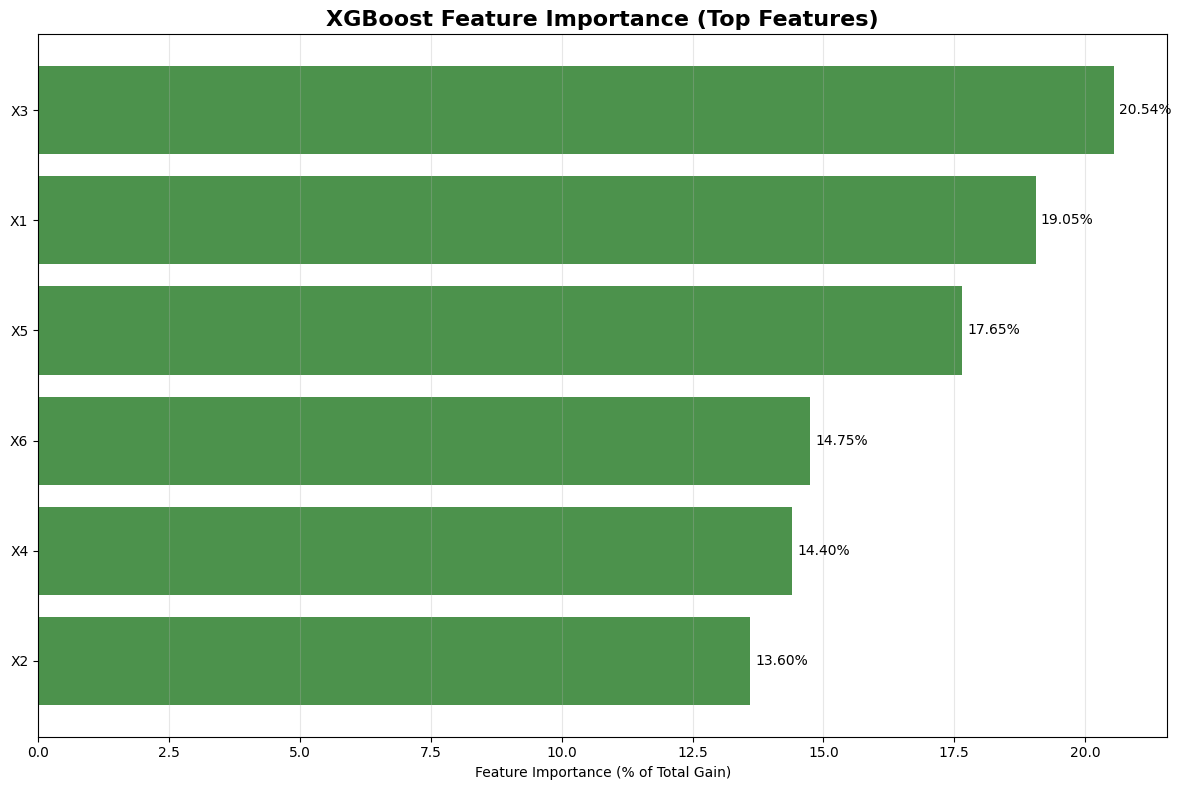

In [89]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def optimize_xgboost_pipeline(X, y, feature_names=None, test_size=0.2, random_state=42, plot_importance=True):
    """
    Creates pipeline for XGBoost with GridSearchCV optimization and feature importance visualization
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    feature_names : list, optional
        Names of features for visualization
    test_size : float, default=0.2
        Proportion of dataset to include in test split
    random_state : int, default=42
        Random state for reproducibility
    plot_importance : bool, default=True
        Whether to plot feature importance
    
    Returns:
    --------
    results : dict
        Dictionary containing accuracy score and feature importance
    """
    
    # Convert to numpy arrays if needed and get feature names
    if hasattr(X, 'columns'):
        if feature_names is None:
            feature_names = X.columns.tolist()
        X = X.values
    elif feature_names is None:
        feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
    
    if hasattr(y, 'values'):
        y = y.values
    
    # Reshape y to ensure it's 1-dimensional
    y = y.reshape(-1)
    
    # Train-test split with stratification to maintain class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Create pipeline for XGBoost
    # StandardScaler is optional for XGBoost but can help with convergence
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(
            random_state=random_state,
            eval_metric='logloss',  # Suppress warning for binary classification
            verbosity=0  # Reduce output verbosity
        ))
    ])
    
    # Parameter grid for GridSearchCV
    # n_estimators: Number of boosting rounds (trees)
    # max_depth: Maximum depth of trees (controls overfitting)
    # learning_rate: Step size shrinkage to prevent overfitting
    # subsample: Fraction of samples used for training each tree
    # colsample_bytree: Fraction of features used for training each tree
    # reg_alpha: L1 regularization term
    # reg_lambda: L2 regularization term
    param_grid = {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 4, 6],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.8, 0.9, 1.0],
        'classifier__colsample_bytree': [0.8, 0.9, 1.0],
        'classifier__reg_alpha': [0, 0.1, 1],
        'classifier__reg_lambda': [1, 1.5, 2]
    }
    
    # GridSearchCV optimization with 5-fold cross-validation
    grid_search = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1,
        verbose=0  # Reduce output verbosity
    )
    
    # Fit the model and find best hyperparameters
    print("Training XGBoost with GridSearchCV optimization...")
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Make predictions on test set
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Extract feature importance from the trained XGBoost model
    # XGBoost provides several importance types: 'weight', 'gain', 'cover'
    # 'gain' is most similar to traditional feature importance (average gain when feature is used)
    xgb_model = best_model.named_steps['classifier']
    
    # Get feature importance (gain-based by default)
    feature_importance = xgb_model.feature_importances_
    
    # Create feature importance dictionary
    importance_dict = {
        'feature_names': feature_names,
        'importance_scores': feature_importance,
        'importance_percentage': (feature_importance / feature_importance.sum()) * 100
    }
    
    # Sort features by importance
    importance_indices = np.argsort(feature_importance)[::-1]
    sorted_features = [feature_names[i] for i in importance_indices]
    sorted_importance = feature_importance[importance_indices]
    sorted_percentage = (sorted_importance / sorted_importance.sum()) * 100
    
    # Print optimization results
    print("XGBOOST OPTIMIZATION RESULTS")
    print("=" * 45)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    print(f"\nTOP 10 FEATURE IMPORTANCE (Gain-based):")
    print("-" * 45)
    for i in range(min(10, len(sorted_features))):
        print(f"{i+1:2d}. {sorted_features[i]:<20} {sorted_percentage[i]:6.2f}%")
    
    # Plot feature importance if requested
    if plot_importance:
        plot_feature_importance(sorted_features, sorted_percentage, top_n=15)
    
    # Prepare results dictionary
    results = {
        'accuracy': test_accuracy,
        'best_params': grid_search.best_params_,
        'cv_score': grid_search.best_score_,
        'feature_importance': importance_dict,
        'model': best_model
    }
    
    return results

def plot_feature_importance(feature_names, importance_scores, top_n=15, figsize=(12, 8)):
    """
    Plots feature importance for XGBoost model based on gain values
    
    Parameters:
    -----------
    feature_names : list
        Names of features (already sorted by importance)
    importance_scores : array
        Importance scores (already sorted) - gain-based importance as percentages
    top_n : int, default=15
        Number of top features to display
    figsize : tuple, default=(12, 8)
        Figure size for the plot
    """
    # Take top N features to avoid overcrowded plots
    top_features = feature_names[:top_n]
    top_scores = importance_scores[:top_n]
    
    # Create the horizontal bar plot
    plt.figure(figsize=figsize)
    
    # Create horizontal bars with XGBoost-themed colors
    y_pos = np.arange(len(top_features))
    bars = plt.barh(y_pos, top_scores, color='darkgreen', alpha=0.7)
    
    # Customize the plot appearance
    plt.yticks(y_pos, top_features)
    plt.xlabel('Feature Importance (% of Total Gain)')
    plt.title('XGBoost Feature Importance (Top Features)', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()  # Show highest importance at the top
    
    # Add value labels on bars for better readability
    for i, (bar, score) in enumerate(zip(bars, top_scores)):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{score:.2f}%', ha='left', va='center', fontsize=10)
    
    # Add grid and final styling touches
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

def get_detailed_xgboost_importance(model, feature_names, importance_type='gain'):
    """
    Get detailed feature importance from XGBoost model with different importance types
    
    Parameters:
    -----------
    model : XGBoost model
        Trained XGBoost model from the pipeline
    feature_names : list
        Names of features
    importance_type : str, default='gain'
        Type of importance: 'weight', 'gain', or 'cover'
    
    Returns:
    --------
    importance_df : dict
        Dictionary with different importance metrics
    """
    
    xgb_model = model.named_steps['classifier']
    
    # Get different types of importance
    importance_types = ['weight', 'gain', 'cover']
    importance_results = {}
    
    for imp_type in importance_types:
        try:
            # Get importance for this type
            importance_dict = xgb_model.get_booster().get_score(importance_type=imp_type)
            
            # Convert to array format matching feature names
            importance_array = np.zeros(len(feature_names))
            for i, feature_name in enumerate(feature_names):
                # XGBoost uses f0, f1, f2... as feature names internally
                xgb_feature_name = f'f{i}'
                if xgb_feature_name in importance_dict:
                    importance_array[i] = importance_dict[xgb_feature_name]
            
            # Normalize to percentages
            if importance_array.sum() > 0:
                importance_percentage = (importance_array / importance_array.sum()) * 100
            else:
                importance_percentage = importance_array
            
            importance_results[imp_type] = {
                'raw_scores': importance_array,
                'percentages': importance_percentage,
                'feature_names': feature_names
            }
            
        except Exception as e:
            print(f"Could not get {imp_type} importance: {e}")
            importance_results[imp_type] = None
    
    return importance_results



results_3 = optimize_xgboost_pipeline(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def train_top_features_xgb(X, y, xgb_results, top_n=3, feature_names=None, test_size=0.2, random_state=42):
    """
    Trains and evaluates XGBoost using only the top N most important features
    from the previous optimization results
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    xgb_results : dict
        Results dictionary from optimize_xgboost_pipeline function
    top_n : int, default=3
        Number of top features to select based on gain importance
    feature_names : list, optional
        Names of features for interpretation
    test_size : float, default=0.2
        Proportion of dataset to include in test split
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    top_results : dict
        Dictionary containing accuracy and feature information for top N features model
    """
    
    # Convert to numpy arrays if needed and get feature names
    if hasattr(X, 'columns'):
        if feature_names is None:
            feature_names = X.columns.tolist()
        X = X.values
    elif feature_names is None:
        feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
    
    if hasattr(y, 'values'):
        y = y.values
    
    # Reshape y to ensure it's 1-dimensional
    y = y.reshape(-1)
    
    # Extract top N most important features from previous XGBoost results
    # Feature importance is based on gain values from XGBoost
    feature_importance = xgb_results['feature_importance']['importance_scores']
    importance_indices = np.argsort(feature_importance)[::-1]
    
    # Validate top_n parameter to ensure it doesn't exceed available features
    max_features = len(feature_names)
    if top_n > max_features:
        print(f"Warning: top_n ({top_n}) exceeds available features ({max_features}). Using all features.")
        top_n = max_features
    
    # Get top N feature indices, names, and importance scores
    top_indices = importance_indices[:top_n]
    top_feature_names = [feature_names[i] for i in top_indices]
    top_importance = feature_importance[top_indices]
    top_percentage = (top_importance / top_importance.sum()) * 100
    
    # Display selected features information
    print(f"TOP {top_n} FEATURES XGBOOST TRAINING")
    print("=" * 45)
    print(f"Selected top {top_n} features based on gain importance:")
    for i, (name, pct) in enumerate(zip(top_feature_names, top_percentage)):
        print(f"{i+1}. {name:<20} {pct:6.2f}%")
    
    # Select only top N features from the feature matrix
    X_top = X[:, top_indices]
    
    # Perform train-test split with stratification to maintain class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X_top, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Use the same best hyperparameters from the original optimization
    best_params = xgb_results['best_params']
    
    # Extract XGBoost parameters (remove 'classifier__' prefix)
    xgb_params = {k.replace('classifier__', ''): v for k, v in best_params.items()}
    
    # Create pipeline with the optimized hyperparameters
    # StandardScaler is optional for XGBoost but kept for consistency
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(
            random_state=random_state,
            eval_metric='logloss',  # Suppress warning for binary classification
            verbosity=0,  # Reduce output verbosity
            **xgb_params
        ))
    ])
    
    # Train the XGBoost model on top features
    pipeline.fit(X_train, y_train)
    
    # Make predictions on both training and test sets
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate training accuracy to assess overfitting
    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Display training results
    print(f"\nRESULTS:")
    print("-" * 30)
    print(f"Train accuracy: {train_accuracy:.4f}")
    print(f"Test accuracy:  {test_accuracy:.4f}")
    print(f"Overfitting:    {train_accuracy - test_accuracy:.4f}")
    
    # Compare performance with the original full-feature model
    original_accuracy = xgb_results['accuracy']
    accuracy_difference = test_accuracy - original_accuracy
    
    print(f"\nCOMPARISON WITH FULL MODEL:")
    print("-" * 35)
    print(f"Original accuracy (all features): {original_accuracy:.4f}")
    print(f"Top {top_n} accuracy:                   {test_accuracy:.4f}")
    print(f"Difference:                       {accuracy_difference:+.4f}")
    
    # Provide interpretation of performance comparison
    if accuracy_difference >= -0.01:  # Less than 1% performance drop
        print(f"✓ Top {top_n} features maintain similar performance!")
    elif accuracy_difference >= -0.05:  # Less than 5% performance drop
        print(f"◐ Top {top_n} features show acceptable performance")
    else:
        print(f"✗ Significant performance drop with only top {top_n} features")
    
    # Calculate feature reduction benefit
    features_reduced = len(feature_names) - top_n
    reduction_percentage = (features_reduced / len(feature_names)) * 100
    
    print(f"\nFEATURE REDUCTION SUMMARY:")
    print("-" * 30)
    print(f"Original features: {len(feature_names)}")
    print(f"Selected features: {top_n}")
    print(f"Features reduced:  {features_reduced} ({reduction_percentage:.1f}%)")
    
    # Extract feature importance information for the trained model
    xgb_model = pipeline.named_steps['classifier']
    
    # Get feature importance from the trained model (gain-based)
    top_feature_importance = xgb_model.feature_importances_
    
    # Prepare comprehensive results dictionary
    top_results = {
        'accuracy': test_accuracy,
        'train_accuracy': train_accuracy,
        'overfitting': train_accuracy - test_accuracy,
        'top_features': top_feature_names,
        'top_indices': top_indices,
        'top_importance': top_importance,
        'top_percentage': top_percentage,
        'top_feature_importance': top_feature_importance,  # New model's feature importance
        'top_n': top_n,
        'model': pipeline,
        'comparison': {
            'original_accuracy': original_accuracy,
            'accuracy_difference': accuracy_difference,
            'features_reduced': features_reduced,
            'reduction_percentage': reduction_percentage
        },
        'feature_analysis': {
            'total_features': len(feature_names),
            'selected_features': top_n,
            'importance_sum': np.sum(top_feature_importance),
            'max_importance': np.max(top_feature_importance),
            'min_importance': np.min(top_feature_importance),
            'importance_std': np.std(top_feature_importance)
        }
    }
    
    return top_results

def compare_feature_sets_xgb(X, y, xgb_results, feature_counts=[3, 5, 10], feature_names=None, 
                            test_size=0.2, random_state=42):
    """
    Compares XGBoost performance across different numbers of top features
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    xgb_results : dict
        Results from optimize_xgboost_pipeline function
    feature_counts : list, default=[3, 5, 10]
        List of feature counts to compare
    feature_names : list, optional
        Names of features
    test_size : float, default=0.2
        Test set proportion
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    comparison_results : dict
        Dictionary containing results for each feature count
    """
    
    comparison_results = {}
    original_accuracy = xgb_results['accuracy']
    
    print("XGBOOST FEATURE SET COMPARISON")
    print("=" * 50)
    print(f"{'Features':<10} {'Accuracy':<10} {'Difference':<12} {'Status':<15}")
    print("-" * 50)
    print(f"{'All':<10} {original_accuracy:<10.4f} {'+0.0000':<12} {'Baseline':<15}")
    
    for n_features in feature_counts:
        # Train XGBoost model with top n features
        results = train_top_features_xgb(X, y, xgb_results, top_n=n_features, 
                                        feature_names=feature_names, 
                                        test_size=test_size, random_state=random_state)
        
        # Store results
        comparison_results[n_features] = results
        
        # Display comparison
        accuracy = results['accuracy']
        difference = accuracy - original_accuracy
        
        if difference >= -0.01:
            status = "Excellent"
        elif difference >= -0.05:
            status = "Good"
        else:
            status = "Poor"
        
        print(f"{n_features:<10} {accuracy:<10.4f} {difference:+.4f}{'':6} {status:<15}")
        print()  # Add spacing between feature sets
    
    return comparison_results

def analyze_feature_stability(X, y, xgb_results, top_n=10, n_runs=5, feature_names=None, 
                             test_size=0.2):
    """
    Analyzes stability of top features across multiple random runs
    
    Parameters:
    -----------
    X : array-like or DataFrame
        Feature matrix
    y : array-like
        Target vector
    xgb_results : dict
        Results from optimize_xgboost_pipeline function
    top_n : int, default=10
        Number of top features to analyze
    n_runs : int, default=5
        Number of random runs to perform
    feature_names : list, optional
        Names of features
    test_size : float, default=0.2
        Test set proportion
    
    Returns:
    --------
    stability_results : dict
        Dictionary containing stability analysis results
    """
    
    if feature_names is None:
        if hasattr(X, 'columns'):
            feature_names = X.columns.tolist()
        else:
            feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
    
    print(f"FEATURE STABILITY ANALYSIS")
    print("=" * 40)
    print(f"Running {n_runs} iterations with different random states...")
    
    feature_selection_frequency = {name: 0 for name in feature_names}
    accuracy_scores = []
    
    for run in range(n_runs):
        # Use different random state for each run
        random_state = 42 + run
        
        results = train_top_features_xgb(X, y, xgb_results, top_n=top_n, 
                                        feature_names=feature_names, 
                                        test_size=test_size, random_state=random_state)
        
        # Track which features were selected
        for feature in results['top_features']:
            feature_selection_frequency[feature] += 1
        
        # Track accuracy
        accuracy_scores.append(results['accuracy'])
        
        print(f"Run {run+1}/{n_runs} completed - Accuracy: {results['accuracy']:.4f}")
    
    # Calculate stability metrics
    mean_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)
    
    # Sort features by selection frequency
    sorted_features = sorted(feature_selection_frequency.items(), 
                           key=lambda x: x[1], reverse=True)
    
    print(f"\nSTABILITY RESULTS:")
    print("-" * 40)
    print(f"Mean accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"\nFeature Selection Frequency (Top {min(15, len(sorted_features))}):")
    print("-" * 40)
    for i, (feature, freq) in enumerate(sorted_features[:15]):
        percentage = (freq / n_runs) * 100
        print(f"{i+1:2d}. {feature:<20} {freq}/{n_runs} ({percentage:5.1f}%)")
    
    stability_results = {
        'mean_accuracy': mean_accuracy,
        'std_accuracy': std_accuracy,
        'accuracy_scores': accuracy_scores,
        'feature_frequency': dict(sorted_features),
        'stable_features': [name for name, freq in sorted_features if freq >= n_runs * 0.8],  # 80% threshold
        'n_runs': n_runs,
        'top_n': top_n
    }
    
    return stability_results



top_results = train_top_features_xgb(X, y, results_3, top_n=2, feature_names=None, test_size=0.2, random_state=42)



TOP 2 FEATURES XGBOOST TRAINING
Selected top 2 features based on gain importance:
1. X3                    51.88%
2. X1                    48.12%

RESULTS:
------------------------------
Train accuracy: 0.6300
Test accuracy:  0.7308
Overfitting:    -0.1008

COMPARISON WITH FULL MODEL:
-----------------------------------
Original accuracy (all features): 0.6154
Top 2 accuracy:                   0.7308
Difference:                       +0.1154
✓ Top 2 features maintain similar performance!

FEATURE REDUCTION SUMMARY:
------------------------------
Original features: 6
Selected features: 2
Features reduced:  4 (66.7%)


After optimizing XGBoost, we improved the model's accuracy to 0.7308 by expanding the feature set from the top 2 variables to 4. The most significant variables in this model are X1 and X3. For the next survey we may only use both variables(questions).